# 5G Vision: User Prediction Model

                                                   By: Mansi jadhav

# Content
1. Introduction

2. Data Explore And Data Wrangling

3. Choosing Area Of Interest

4. Data Visualization

5. Predictions

# Introduction

#Putting machine learning techniques into work in the branch of wireless communication specially 5G is a challenging idea. Since we are looking for low latency and fast computations, we need to build a model that runs fast and performs well as it can be judged by its key metrics. In this report, our aim is to predict that the user is on 5G network or not.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
pwd()

'C:\\Users\\Sujal Jadhav'

In [41]:
#Importing Data On Kaggle:
df= pd.read_csv("5G Final Data.csv")
df.shape

(19272, 38)

# Feature Description

# Data Exploration

user_id: Unique identifier for the user.

chnl_type: Type of channel used.

service_type: Type of service provided.

product_type: Type of product associated with the service.

innet_months: Number of months since the user joined the network.

total_times: Total number of transactions or interactions.

total_flux: Total data flux or usage.

total_fee: Total fee charged to the user.

pay_fee: Fee paid by the user.

sex: Gender of the user (encoded as a numerical value).

age: Age of the user (encoded as a numerical value).

manu_name: Manufacturer name or ID (encoded as a numerical value).

term_type: Type of term or subscription.

max_rat_flag: Flag indicating maximum rate or plan.

is_5g_base_cover: Indicator if the user is in a 5G base coverage area.

is_work_5g_cover: Indicator if the user is in a 5G work coverage area

is_home_5g_cover: Indicator if the user is in a 5G home coverage area.

is_work_5g_cover_l01: Indicator for 5G work coverage, level 01.

is_home_5g_cover_l01: Indicator for 5G home coverage, level 01.

is_work_5g_cover_l02: Indicator for 5G work coverage, level 02.

is_home_5g_cover_l02: Indicator for 5G home coverage, level 02.

activity_type: Type of user activity.

is_act_expire: Indicator if the activity is expired.

comp_type: Type of compensation or plan.

call_days: Number of days the user made calls.

re_call10: Number of calls longer than 10 minutes.

short_call10: Number of short calls (less than 10 minutes).

long_call10: Number of long calls (more than 10 minutes).

bank_cnt: Number of transactions or activities related to banking apps.

active_days01 to active_days23: Number of active days in each month (from 01 to 23).

game_app_flux: Data usage related to gaming apps.

live_app_flux: Data usage related to live streaming apps.

video_app_flux: Data usage related to video streaming apps.

city_5g_ratio: Ratio of 5G coverage in the city.

city_level: Level or tier of the city.

is_5g: Indicator if the user is using 5G services.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prov_id               19272 non-null  int64  
 1   chnl_type             19272 non-null  int64  
 2   service_type          19272 non-null  int64  
 3   product_type          19272 non-null  int64  
 4   innet_months          19272 non-null  int64  
 5   total_flux            19272 non-null  float64
 6   total_fee             19272 non-null  float64
 7   pay_fee               19272 non-null  float64
 8   sex                   19272 non-null  int64  
 9   age                   19272 non-null  int64  
 10  manu_name             19272 non-null  int64  
 11  term_type             19272 non-null  int64  
 12  max_rat_flag          19272 non-null  int64  
 13  is_5g_base_cover      19272 non-null  int64  
 14  is_work_5g_cover      19272 non-null  int64  
 15  is_home_5g_cover   

In [43]:
df['call_days']=df['call_days'].astype('int64')

In [44]:
df['total_flux']=df['total_flux'].astype('int64')

In [45]:
df['total_fee']=df['total_fee'].astype('int64')

In [46]:
df['pay_fee']=df['pay_fee'].astype('int64')

In [47]:
df['call_days']=df['call_days'].astype('int64')

In [48]:
df['re_call10']=df['re_call10'].astype('int64')

In [49]:
df['long_call10']=df['long_call10'].astype('int64')

In [50]:
df['game_app_flux']=df['game_app_flux'].astype('int64')

In [51]:
df['bank_cnt']=df['bank_cnt'].astype('int64')

In [52]:
df['video_app_flux']=df['video_app_flux'].astype('int64')

In [53]:
df['live_app_flux']=df['live_app_flux'].astype('int64')

In [54]:
df['city_5g_ratio']=df['city_5g_ratio'].astype('int64')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   prov_id               19272 non-null  int64
 1   chnl_type             19272 non-null  int64
 2   service_type          19272 non-null  int64
 3   product_type          19272 non-null  int64
 4   innet_months          19272 non-null  int64
 5   total_flux            19272 non-null  int64
 6   total_fee             19272 non-null  int64
 7   pay_fee               19272 non-null  int64
 8   sex                   19272 non-null  int64
 9   age                   19272 non-null  int64
 10  manu_name             19272 non-null  int64
 11  term_type             19272 non-null  int64
 12  max_rat_flag          19272 non-null  int64
 13  is_5g_base_cover      19272 non-null  int64
 14  is_work_5g_cover      19272 non-null  int64
 15  is_home_5g_cover      19272 non-null  int64
 16  is_w

In [56]:
df.head()

,prov_id,chnl_type,service_type,product_type,innet_months,total_flux,total_fee,pay_fee,sex,age,...,active_days02,active_days03,active_days04,active_days05,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level,Target
0,36,7,4,3,5,6,89,580,1,26,...,0,0,0,0,0,0,0,0,3,0
1,76,7,4,4,104,9,62,710,0,32,...,0,0,0,0,0,0,1235,0,3,0
2,84,10,4,5,15,5,75,90,0,37,...,0,0,0,0,0,9,1194,0,2,0
3,85,7,4,3,21,9,54,300,1,55,...,0,0,0,0,0,0,26,0,6,0
4,76,9,4,3,32,11,158,990,1,21,...,0,0,0,0,0,97,11664,0,5,0


In [57]:
df.head(2)

,prov_id,chnl_type,service_type,product_type,innet_months,total_flux,total_fee,pay_fee,sex,age,...,active_days02,active_days03,active_days04,active_days05,game_app_flux,live_app_flux,video_app_flux,city_5g_ratio,city_level,Target
0,36,7,4,3,5,6,89,580,1,26,...,0,0,0,0,0,0,0,0,3,0
1,76,7,4,4,104,9,62,710,0,32,...,0,0,0,0,0,0,1235,0,3,0


In [58]:
df.prov_id.value_counts(),print(df.prov_id.value_counts().count()," Categories")

31  Categories


(prov_id
 51    4829
 11    1679
 81    1115
 85    1104
 71    1009
 76     961
 31     941
 17     797
 34     664
 36     560
 74     521
 91     486
 18     421
 83     408
 84     386
 38     377
 19     332
 89     330
 75     292
 10     287
 30     285
 90     277
 59     250
 97     206
 87     166
 13     161
 86     157
 50     110
 88      74
 70      73
 79      14
 Name: count, dtype: int64,
 None)

In [59]:
df.nunique()

prov_id                   31
chnl_type                 10
service_type               5
product_type               5
innet_months             256
total_flux                13
total_fee                455
pay_fee                 1887
sex                        2
age                       43
manu_name                 12
term_type                  6
max_rat_flag               4
is_5g_base_cover           2
is_work_5g_cover           2
is_home_5g_cover           2
is_work_5g_cover_l01       2
is_home_5g_cover_l01       2
is_work_5g_cover_l02       2
is_home_5g_cover_l02       2
activity_type             10
is_act_expire              3
comp_type                  7
call_days                 31
re_call10                330
long_call10               90
bank_cnt                 173
active_days01             31
active_days02             31
active_days03             28
active_days04              3
active_days05             31
game_app_flux             14
live_app_flux           1697
video_app_flux

In [60]:
assert df.isnull().sum().sum()==0 , df_test.isnull().sum().sum() == 0

# Data Visualization

In [61]:
df.columns.shape[0]

38

In [62]:
df.count()

prov_id                 19272
chnl_type               19272
service_type            19272
product_type            19272
innet_months            19272
total_flux              19272
total_fee               19272
pay_fee                 19272
sex                     19272
age                     19272
manu_name               19272
term_type               19272
max_rat_flag            19272
is_5g_base_cover        19272
is_work_5g_cover        19272
is_home_5g_cover        19272
is_work_5g_cover_l01    19272
is_home_5g_cover_l01    19272
is_work_5g_cover_l02    19272
is_home_5g_cover_l02    19272
activity_type           19272
is_act_expire           19272
comp_type               19272
call_days               19272
re_call10               19272
long_call10             19272
bank_cnt                19272
active_days01           19272
active_days02           19272
active_days03           19272
active_days04           19272
active_days05           19272
game_app_flux           19272
live_app_f

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
prov_id,19272.0,53.286166,26.115806,10.0,31.0,51.0,76.0,97.0
chnl_type,19272.0,7.156289,2.534053,1.0,7.0,7.0,9.0,10.0
service_type,19272.0,3.958541,0.335401,1.0,4.0,4.0,4.0,5.0
product_type,19272.0,3.775114,1.249012,2.0,3.0,4.0,5.0,6.0
innet_months,19272.0,56.651048,44.412200,1.0,23.0,40.0,83.0,272.0
total_flux,19272.0,8.662308,1.969229,0.0,8.0,9.0,10.0,12.0
total_fee,19272.0,114.323526,75.003927,50.0,69.0,98.0,130.0,3000.0
pay_fee,19272.0,735.991335,1287.265573,0.0,405.0,600.0,860.0,86320.0
sex,19272.0,0.708956,0.454256,0.0,0.0,1.0,1.0,1.0
age,19272.0,34.131590,10.221831,18.0,26.0,32.0,41.0,60.0


In [64]:
df.isna().sum()

prov_id                 0
chnl_type               0
service_type            0
product_type            0
innet_months            0
total_flux              0
total_fee               0
pay_fee                 0
sex                     0
age                     0
manu_name               0
term_type               0
max_rat_flag            0
is_5g_base_cover        0
is_work_5g_cover        0
is_home_5g_cover        0
is_work_5g_cover_l01    0
is_home_5g_cover_l01    0
is_work_5g_cover_l02    0
is_home_5g_cover_l02    0
activity_type           0
is_act_expire           0
comp_type               0
call_days               0
re_call10               0
long_call10             0
bank_cnt                0
active_days01           0
active_days02           0
active_days03           0
active_days04           0
active_days05           0
game_app_flux           0
live_app_flux           0
video_app_flux          0
city_5g_ratio           0
city_level              0
Target                  0
dtype: int64

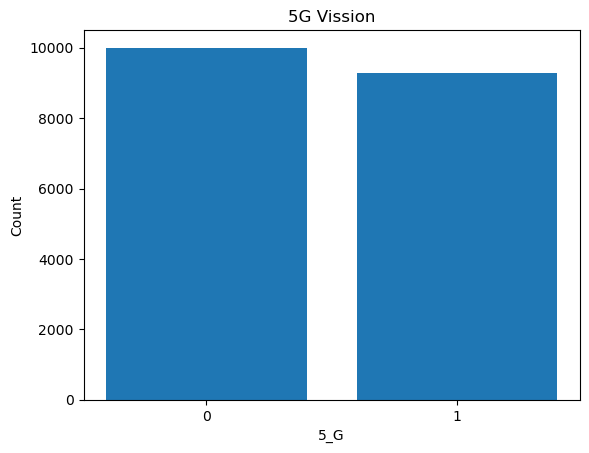

In [65]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Target' is the name of the target feature
target_counts = df['Target'].value_counts()

# Plotting
plt.bar(target_counts.index.astype(str), target_counts.values)
plt.xlabel('5_G')
plt.ylabel('Count')
plt.title('5G Vission')
plt.show()

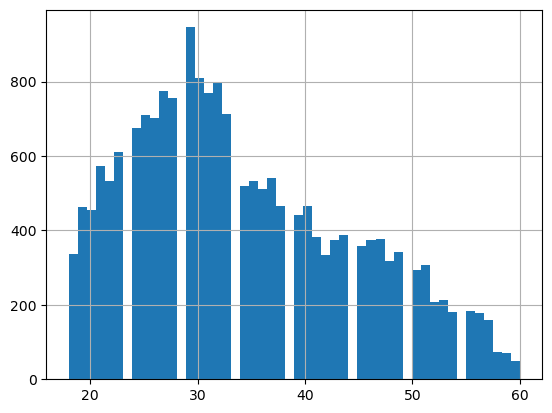

In [66]:
df['age'].hist(bins=50)
plt.show()

<Axes: >

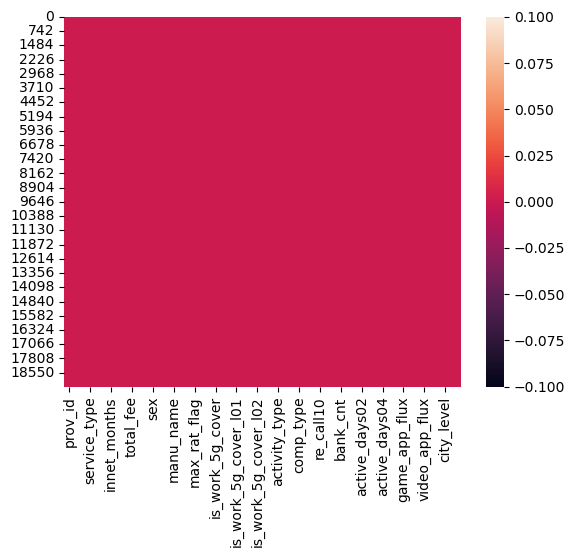

In [67]:
sns.heatmap(df.isnull())

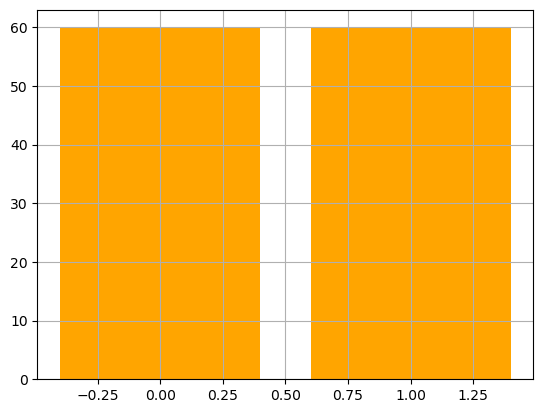

<Figure size 500x500 with 0 Axes>

In [68]:
plt.bar(df["is_5g_base_cover"],df["age"],color="orange")
plt.grid()
plt.figure(figsize=(5,5))
plt.show()

In [69]:
X = df.drop('Target', axis=1)
y = df['Target']

In [70]:

X.shape, y.shape

((19272, 37), (19272,))

In [40]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [41]:
X = scaler.fit_transform(X)
X

array([[-0.66192155, -0.06167708,  0.12361363, ..., -0.58732254,
         0.        , -0.40270696],
       [ 0.86975768, -0.06167708,  0.12361363, ..., -0.44686305,
         0.        , -0.40270696],
       [ 1.17609352,  1.12222793,  0.12361363, ..., -0.45152608,
         0.        , -0.78867119],
       ...,
       [-0.08754184, -0.45631208,  0.12361363, ..., -0.58425177,
         0.        , -1.17463541],
       [-0.08754184, -1.24558208,  0.12361363, ..., -0.07984865,
         0.        ,  0.7551857 ],
       [ 0.67829777,  0.72759293,  0.12361363, ...,  3.01162498,
         0.        , -0.78867119]])

# Logistic regression

In [71]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
# Training Model
model_lg.fit(X_train, y_train)
LogisticRegression(max_iter=120, n_jobs=20, random_state=0)
# Making Prediction
pred_lg = model_lg.predict(X_test)
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.7437106918238994


In [45]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      3304
           1       0.74      0.72      0.73      3056

    accuracy                           0.74      6360
   macro avg       0.74      0.74      0.74      6360
weighted avg       0.74      0.74      0.74      6360



<Axes: >

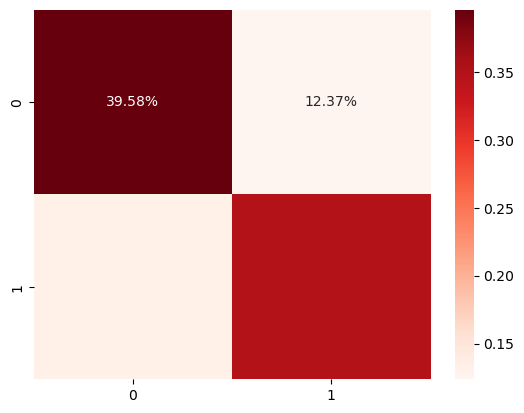

In [46]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

# Decision TreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(X_train,y_train)
# Making Prediction
pred_dt = model_dt.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.7786163522012579


In [48]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      3304
           1       0.73      0.84      0.79      3056

    accuracy                           0.78      6360
   macro avg       0.78      0.78      0.78      6360
weighted avg       0.79      0.78      0.78      6360



<Axes: >

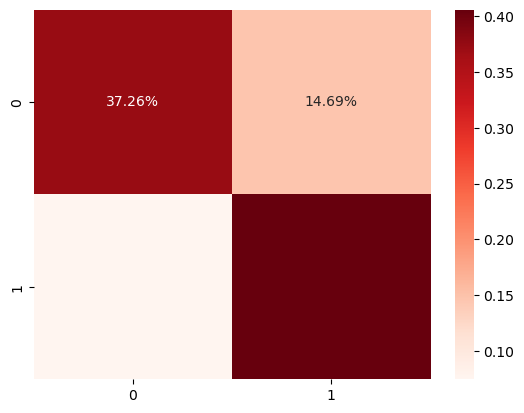

In [49]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
# Training Model
model_rf.fit(X_train, y_train)
# Making Prediction
pred_rf = model_rf.predict(X_test)
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.7462264150943396


In [51]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      3304
           1       0.73      0.74      0.74      3056

    accuracy                           0.75      6360
   macro avg       0.75      0.75      0.75      6360
weighted avg       0.75      0.75      0.75      6360



<Axes: >

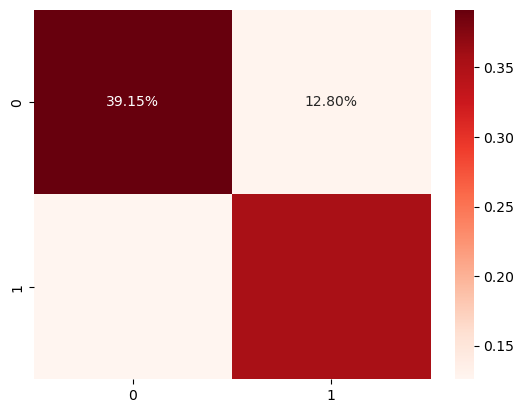

In [52]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Training Model
model_kn.fit(X_train, y_train)
# Making Prediction
pred_kn = model_kn.predict(X_test)
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.7284591194968554


In [54]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      3304
           1       0.71      0.74      0.72      3056

    accuracy                           0.73      6360
   macro avg       0.73      0.73      0.73      6360
weighted avg       0.73      0.73      0.73      6360



<Axes: >

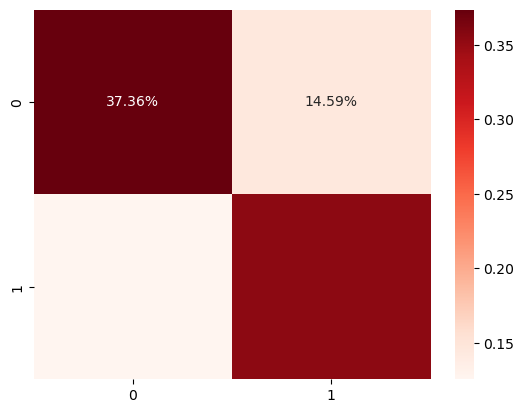

In [55]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

# Support Vector Machine

In [56]:
from sklearn.svm import SVC, LinearSVC
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
# Making Prediction
pred_svm = model_svm.predict(X_test)
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.780188679245283


In [57]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3304
           1       0.77      0.78      0.77      3056

    accuracy                           0.78      6360
   macro avg       0.78      0.78      0.78      6360
weighted avg       0.78      0.78      0.78      6360



<Axes: >

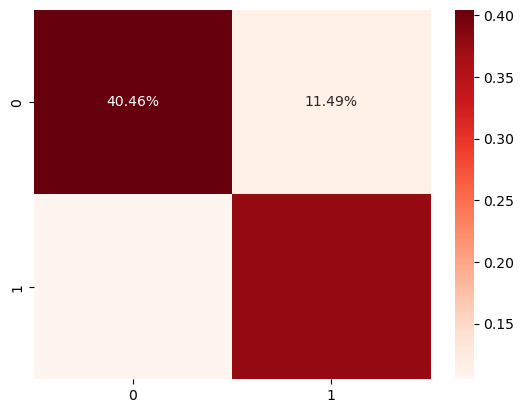

In [58]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

# compiled results

,Model,Accuracy_score
4,SVM,0.780189
1,Decision Tree,0.778616
2,Random Forest,0.746226
0,Logistic Regression,0.743711
3,KNeighbours,0.728459


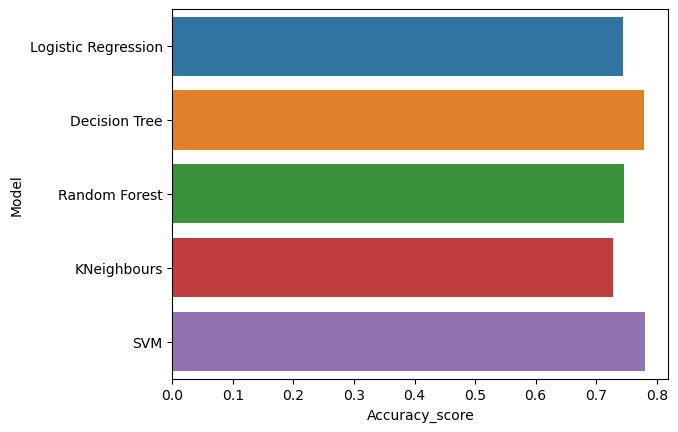

In [59]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'SVM'],
    'Accuracy_score' :[lg, dt, rf, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

# conclusion

In my project the for the 5G Vission the SVM and Decision Tree in the Best and give the acurate answer and more acurate predicton 